In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
np.random.seed = 42

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


### Get data

In [2]:
path = '/kaggle/input/house-prices-advanced-regression-techniques/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
sample_sub = pd.read_csv(path + 'sample_submission.csv')

### Take a Quick Look at the Data Structure

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# statistics summary of target 'SalePrice'
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

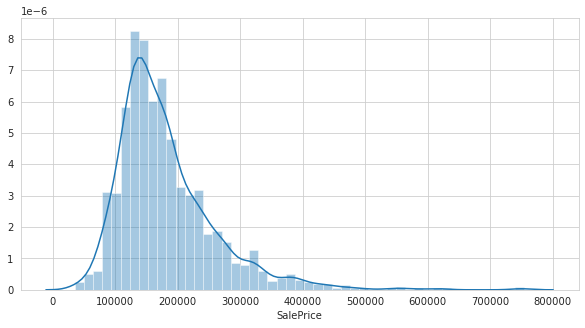

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'])

### Looking for Correlations

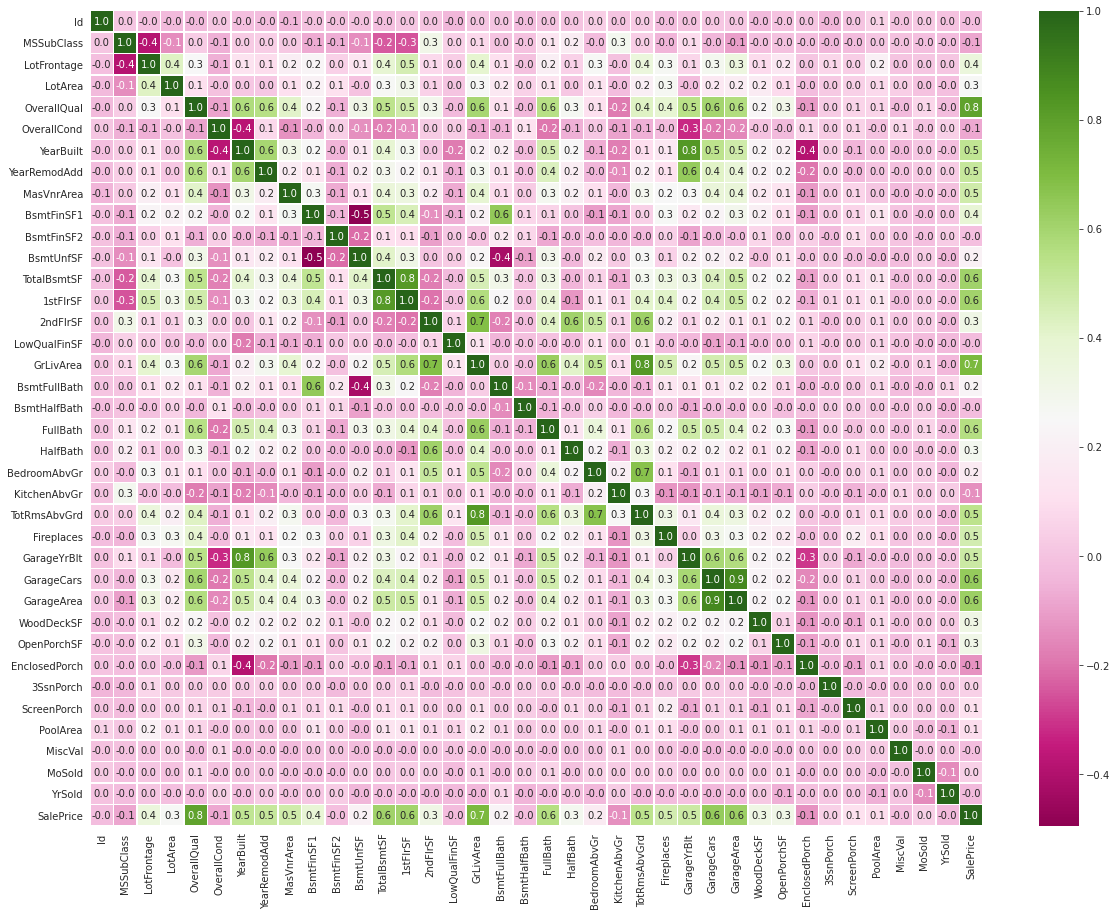

In [9]:
# correlation matrix
corr_matrix = train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='PiYG', linewidths=.5)

In [10]:
corr_dict=corr_matrix['SalePrice'].sort_values(ascending=False).to_dict()
num_cols=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<0.9)) | (value<=-0.1):
        num_cols.append(key)
num_cols

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr']

Let's create some new features through the relation of one feature to another and check their correlation to SalePrices

In [11]:
def new_feature(feat_1):
    '''check correlation between SalePrice and ratio of two feature and choose better'''
    new_sales = train[['SalePrice', feat_1]]
    for col in train.select_dtypes(exclude='object').columns[:-1]:
        new_sales[col + '_per_' + feat_1] = train[col] + train[feat_1]
        new_sales[col] = train[col]
        diff = new_sales.corr()['SalePrice'][col + '_per_' + feat_1] - new_sales.corr()['SalePrice'][col]
        feat_diff = new_sales.corr()['SalePrice'][col + '_per_' + feat_1] - new_sales.corr()['SalePrice'][feat_1]
        if diff > 0.05 and feat_diff > 0.05:
            print(new_sales.corr().loc['SalePrice', col + '_per_' + feat_1])
    print(new_sales.corr()['SalePrice'].sort_values(ascending=False))

In [12]:
# Here, the example one of many correlation matrix and best new features
new_feature('Fireplaces')

0.6456917736179169
0.6041541486467756
0.6934523154432983
SalePrice                       1.000000
OverallQual_per_Fireplaces      0.800610
OverallQual                     0.790982
GrLivArea_per_Fireplaces        0.708795
GrLivArea                       0.708624
GarageCars_per_Fireplaces       0.693452
FullBath_per_Fireplaces         0.645692
GarageCars                      0.640409
GarageArea_per_Fireplaces       0.624330
GarageArea                      0.623431
TotalBsmtSF_per_Fireplaces      0.613960
TotalBsmtSF                     0.613581
1stFlrSF_per_Fireplaces         0.606215
1stFlrSF                        0.605852
TotRmsAbvGrd_per_Fireplaces     0.604154
FullBath                        0.560664
TotRmsAbvGrd                    0.533723
YearBuilt_per_Fireplaces        0.531071
YearBuilt                       0.522897
YearRemodAdd_per_Fireplaces     0.519605
YearRemodAdd                    0.507101
GarageYrBlt_per_Fireplaces      0.497327
HalfBath_per_Fireplaces         0.496116


In [13]:
# creating more constructive features
new_feature = train[['SalePrice']]
new_feature['facilities'] = train['FullBath'] + train['Fireplaces'] + train['GarageCars']
new_feature.corr()

,SalePrice,facilities
SalePrice,1.000000,0.746301
facilities,0.746301,1.000000


In [14]:
# checking if the selected column has missing data
train['GarageCars'].isnull().sum()

0

Our function shows good correlations in the following new properties:

In [15]:
sales = train[['SalePrice']]
sales['SalePrice_log'] = np.log1p(train[['SalePrice']])
sales['YearBuilt_and_RemodAdd'] = train['YearBuilt'] + train['YearRemodAdd'] 
sales['Bsmt_and_porch'] = train['TotalBsmtSF'] + train['MasVnrArea'] + train['WoodDeckSF'] + train['OpenPorchSF']
sales['house_SF'] = train['2ndFlrSF'] + train['TotalBsmtSF'] + train['1stFlrSF'] + train['GarageArea']
sales['facilities'] = train['FullBath'] + train['Fireplaces'] + train['GarageCars']

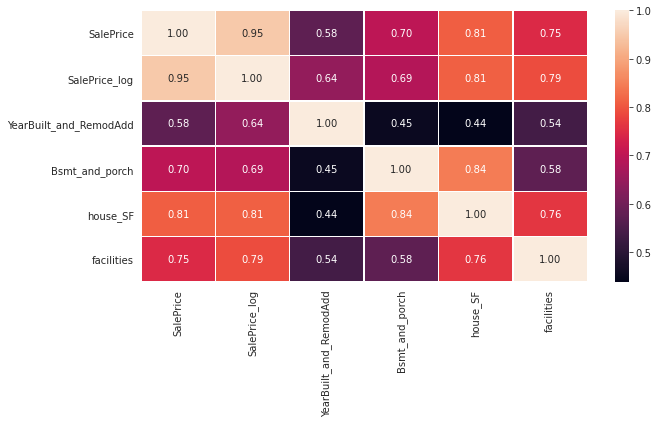

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(sales.corr(), annot=True, fmt='.2f', linewidths=.5)

In [17]:
sales_train = train.drop('SalePrice', axis=1)
sales_label = np.log1p(train[['SalePrice']])

### Prepare the Data

Missing data

In [18]:
train[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageCars     1460 non-null   int64  
 3   GarageArea     1460 non-null   int64  
 4   TotalBsmtSF    1460 non-null   int64  
 5   1stFlrSF       1460 non-null   int64  
 6   FullBath       1460 non-null   int64  
 7   TotRmsAbvGrd   1460 non-null   int64  
 8   YearBuilt      1460 non-null   int64  
 9   YearRemodAdd   1460 non-null   int64  
 10  GarageYrBlt    1379 non-null   float64
 11  MasVnrArea     1452 non-null   float64
 12  Fireplaces     1460 non-null   int64  
 13  BsmtFinSF1     1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  WoodDeckSF     1460 non-null   int64  
 16  2ndFlrSF       1460 non-null   int64  
 17  OpenPorchSF    1460 non-null   int64  
 18  HalfBath

In [19]:
train[num_cols].isnull().sum()

OverallQual        0
GrLivArea          0
GarageCars         0
GarageArea         0
TotalBsmtSF        0
1stFlrSF           0
FullBath           0
TotRmsAbvGrd       0
YearBuilt          0
YearRemodAdd       0
GarageYrBlt       81
MasVnrArea         8
Fireplaces         0
BsmtFinSF1         0
LotFrontage      259
WoodDeckSF         0
2ndFlrSF           0
OpenPorchSF        0
HalfBath           0
LotArea            0
BsmtFullBath       0
BsmtUnfSF          0
BedroomAbvGr       0
ScreenPorch        0
EnclosedPorch      0
KitchenAbvGr       0
dtype: int64

In [20]:
# delete column 'LotFrontage'
num_cols.pop(14)


'LotFrontage'

In [21]:
# delete column 'GarageYrBlt'
num_cols.pop(10)

'GarageYrBlt'

In [22]:
train[['MasVnrArea']].describe()

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


In [23]:
test[num_cols].isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        1
GarageArea        1
TotalBsmtSF       1
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
Fireplaces        0
BsmtFinSF1        1
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
HalfBath          0
LotArea           0
BsmtFullBath      2
BsmtUnfSF         1
BedroomAbvGr      0
ScreenPorch       0
EnclosedPorch     0
KitchenAbvGr      0
dtype: int64

Regarding describe we should impute 8 missing data in 'Masonry veneer area in square feet' feature by 0

In [24]:
# categorical columns
cat_cols = [col for col in sales_train.columns 
            if sales_train[col].dtype == "object"  
            and sales_train[col].isnull().sum() < 100]

#  and sales_train[col].nunique() < 10

In [25]:
train[cat_cols].isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [26]:
test[cat_cols].isnull().sum()

MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageType       76
GarageFinish     78
GarageQual       78
GarageCond       78
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64

* 81 missing data in columns including the name 'Garage', most likely from the same observations where there is no garage. Replacing the missing data with 'None' is appropriate.
* Based on the dataset description, this also applies to other features with missing data.(except Electrical, but there is just one meaning)


## Preprocessing

In [27]:
train[num_cols].columns.get_loc('YearRemodAdd')

9

In [28]:
num_cols
# sales['YearBuilt_and_RemodAdd'] = train['YearBuilt'] + train['YearRemodAdd'] 
# sales['Bsmt_and_porch'] = train['TotalBsmtSF'] + train['MasVnrArea'] + train['WoodDeckSF'] + train['OpenPorchSF']
# sales['house_SF'] = train['2ndFlrSF'] + train['TotalBsmtSF'] + train['1stFlrSF'] + train['GarageArea']
# sales['facilities'] = train['FullBath'] + train['Fireplaces'] + train['GarageCars']

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr']

In [29]:
sales_train[cat_cols].shape

(1460, 38)

In [30]:
def overfit_reducer(df):

    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.9:
            overfit.append(i)
    overfit = list(overfit)
    return overfit

In [31]:
overfitted_num = overfit_reducer(sales_train[num_cols])
overfitted_num

[]

In [32]:
overfitted_cat = overfit_reducer(sales_train[cat_cols])
overfitted_cat

['Utilities']

In [33]:
cat_cols.pop(4)

'Utilities'

In [34]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, YearBuilt_and_RemodAdd=True): # no *args or **kargs
        self.YearBuilt_and_RemodAdd = YearBuilt_and_RemodAdd
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        Bsmt_and_porch = (X[:, 4] + X[:, 10] + X[:, 13] + X[:, 15])
        house_SF = (X[:, 14] + X[:, 4] + X[:, 5] + X[:, 3])
        facilities = X[:, 6] + X[:, 2] + X[:, 11]
#         if self.YearBuilt_and_RemodAdd:
        YearBuilt_and_RemodAdd = X[:, 8] + X[:, 9]
        return np.c_[X, Bsmt_and_porch, house_SF, facilities, YearBuilt_and_RemodAdd]
#         else:
#             return np.c_[X, Bsmt_and_porch, house_SF, facilities]

In [35]:
class AttributesAddedNone(BaseEstimator, TransformerMixin):
    def __init__(self, YearBuilt_and_RemodAdd=True): # no *args or **kargs
        self.YearBuilt_and_RemodAdd = YearBuilt_and_RemodAdd
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        return np.delete(X, [6,7,12,13,14], axis=1)

In [36]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=0)), 
                        ('attribs_adder', CombinedAttributesAdder()),
#                          ('attribs_del', AttributesDroped()),
                        ('st_scaler', StandardScaler()),
                        ('rb_scaler', RobustScaler()),
                        ('transformer', PowerTransformer())])

In [37]:
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='None')),
                        ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [38]:
full_pipeline = ColumnTransformer([('num', num_pipeline, num_cols), 
                                   ('cat', cat_pipeline, cat_cols)])

In [39]:
sales_prepared = full_pipeline.fit_transform(sales_train)
sales_prepared.shape

(1460, 270)

In [40]:
test_prepared = full_pipeline.transform(test)
test_prepared.shape

(1459, 270)

In [41]:
y_test = np.log1p(sample_sub[['SalePrice']])
y_test

,SalePrice
0,12.039298
1,12.142917
2,12.120431
3,12.096919
4,11.923253
...,...
1454,12.026241
1455,12.012426
1456,12.297847
1457,12.127707


## Training and Evaluating on the Training Set

In [42]:
# output score result function
def display_score(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [43]:
# param_grid_forest = [
#     {'n_estimators': [600], 'max_features': [1]},
#     {'bootstrap': [False], 'n_estimators': [600], 'max_features': [1]},
# ]

# forest_reg = RandomForestRegressor()

# forest_grid = GridSearchCV(forest_reg, param_grid_forest, cv=5, 
#                            scoring='neg_mean_squared_error', 
#                            return_train_score=True)
# forest_grid.fit(sales_prepared, sales_label)

In [44]:
# forest_grid.best_params_

In [45]:
# cvres = forest_grid.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [46]:
final_model = GradientBoostingRegressor(n_estimators=2500, 
                                        learning_rate=0.02, 
                                        max_depth=4,
                                        max_features='sqrt',
                                        min_samples_leaf=15, 
                                        min_samples_split=14,
                                        random_state =42)
final_model.fit(sales_prepared, sales_label)
# cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
# for_scores = cross_val_score(final_model, sales_prepared, sales_label, scoring='neg_mean_squared_error', cv=5)
# for_rmse_scores = np.sqrt(-for_scores)
# display_score(for_rmse_scores)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=14,
                          n_estimators=2500, random_state=42)

In [47]:
y_head=final_model.predict(test_prepared)
y_train=final_model.predict(sales_prepared)
print('-'*10+'RandomForest'+'-'*10)
print('Mean Squared Error Accuracy Train: ', np.sqrt(mean_squared_error(sales_label,y_train)))
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ', mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ', mean_squared_error(y_test,y_head))

----------RandomForest----------
Mean Squared Error Accuracy Train:  0.05686765514660342
R square Accuracy:  -17.276479451702844
Mean Absolute Error Accuracy:  0.31160766399727385
Mean Squared Error Accuracy:  0.1481102447836836


## Final model

In [48]:
# fin_model = RandomForestRegressor(max_features=1, n_estimators=600)
# final_model.fit(X, y)
# fin_predict = final_model.predict(X_testing)

In [49]:
fin_predict = np.floor(np.expm1(y_head))

In [50]:
sample_sub['SalePrice']=fin_predict

In [51]:
sample_sub.head()

,Id,SalePrice
0,1461,127326.0
1,1462,159410.0
2,1463,186389.0
3,1464,190599.0
4,1465,193791.0


In [52]:
sample_sub.to_csv('SampleSubmissionForHousePrice.csv',index=False)